### Description: This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

# Reading and understanding the data

Importing Libraries

In [10]:
# for data wrangling
import numpy as np
import pandas as pd



# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.figure_factory as ff

# for statistics and metrics
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

# for algorithms
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

!pip install shap
import shap

%matplotlib inline

sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)

import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\matebook x\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Importing Data

In [11]:
rta_data = pd.read_csv(r"C:/Users/matebook x/Desktop/TMLC/RTA/dataset/RTA_data.csv")
rta_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


> > EDA

In [12]:
rta_data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [13]:
rta_data.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

In [14]:
rta_data.shape

(12316, 32)

In [15]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

* examining target variable

In [16]:

rta_data['Accident_severity'].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

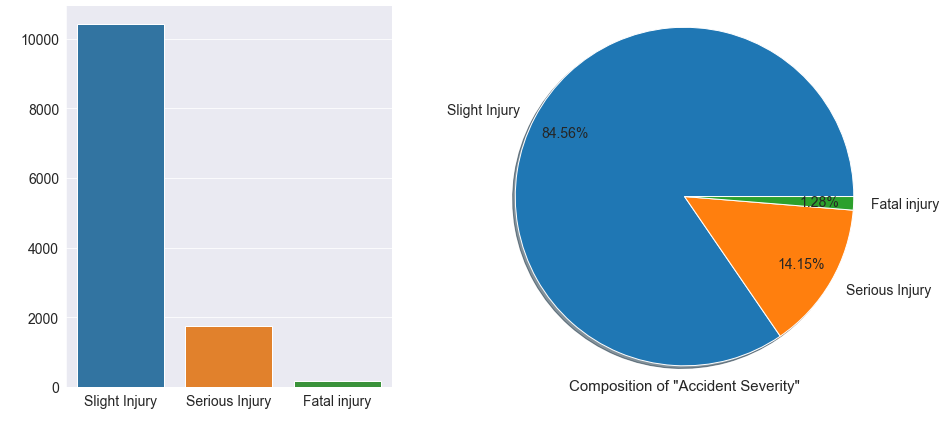

In [17]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=rta_data["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(rta_data["Accident_severity"].value_counts(),
        labels=list(rta_data["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [18]:
# checking for any nullvalues in the dataframe.
rta_data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [19]:
# checking the numerical statistics of our data
rta_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [20]:
rta_data['Cause_of_accident'].value_counts()

No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Unknown                                   25
Improper parking                          25
Name: Cause_of_accident, dtype: int64

In [21]:
rta_data['Defect_of_vehicle'].value_counts()

No defect    7777
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

In [22]:
rta_data['Service_year_of_vehicle'].value_counts()

Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

As we observe, that 4 columns have more than 20% missing values. We can safely remove these columns, as these columns will not add any value to our analysis because of high missing value rate.

In [23]:

rta_data.drop(['Service_year_of_vehicle','Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [24]:
rta_data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [25]:
# Extracting hour and minute from timestamp.

rta_data['hour'] = pd.to_datetime(rta_data['Time']).dt.hour
rta_data['minute'] = pd.to_datetime(rta_data['Time']).dt.minute

In [26]:
rta_data.isna().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
hour                

In [27]:
rta_data.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Area_accident_occured,12077,14,Other,3819


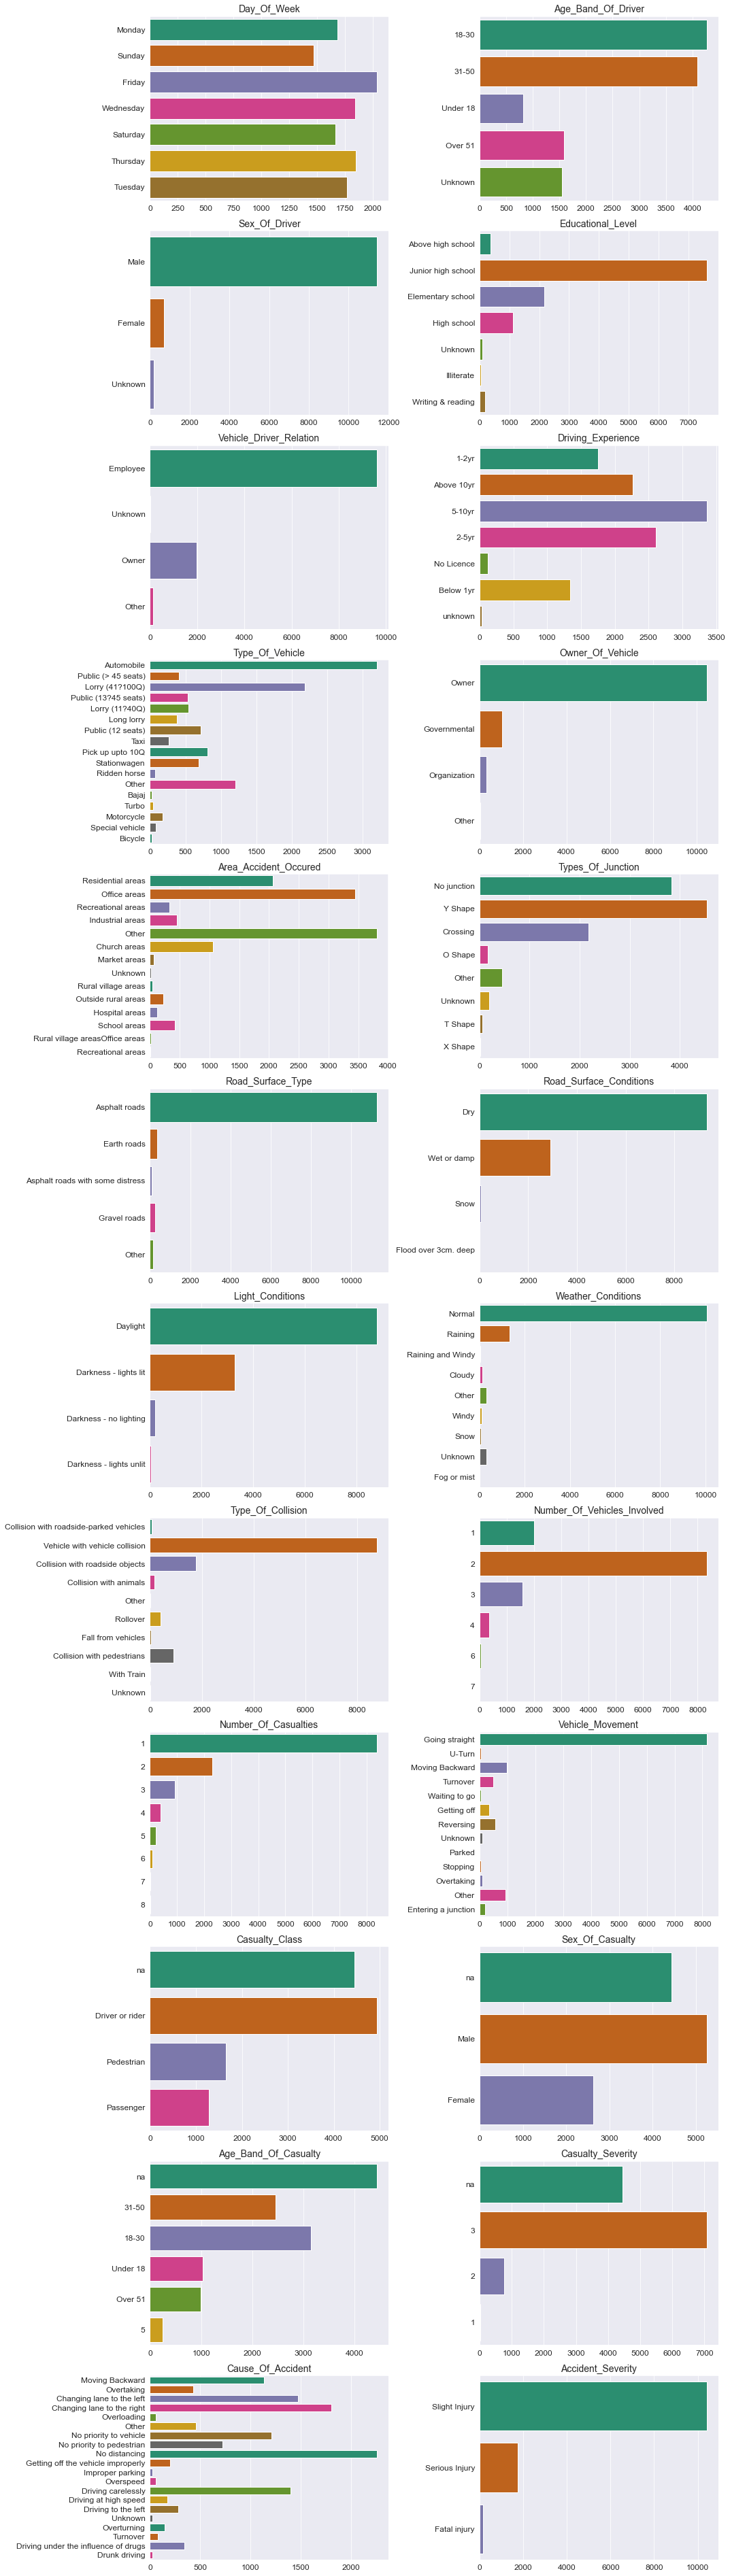

In [28]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in rta_data.drop(['Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement','Time','hour','minute'], axis=1):
    if plotnumber <= rta_data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=rta_data, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

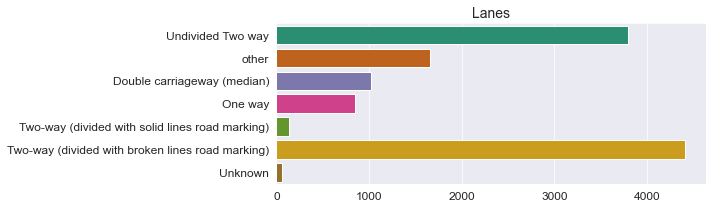

In [29]:
# checking the Lanes column

plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

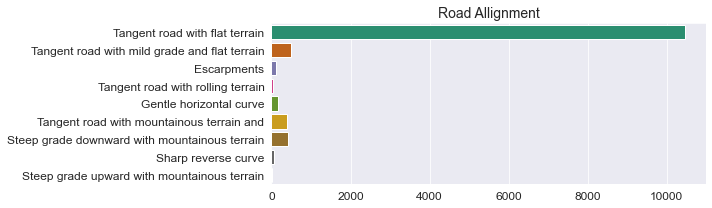

In [30]:
# Checking the Road Allignment column

plt.figure(figsize=(10,3))
sns.countplot(data=rta_data, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

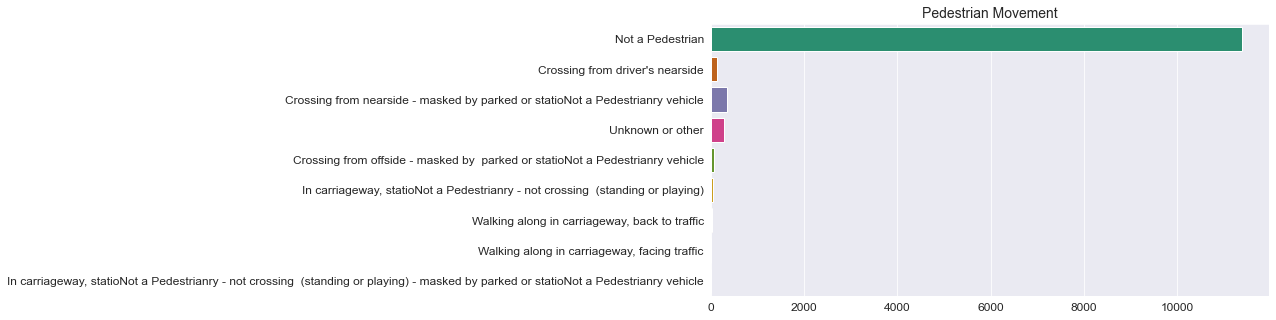

In [31]:
# Checking the Pedestrian Movement column

plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

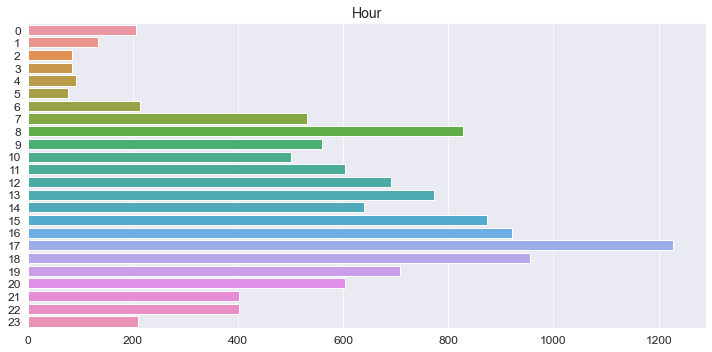

In [32]:
# Checking the hour column

plt.figure(figsize=(10,5))
sns.countplot(data=rta_data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

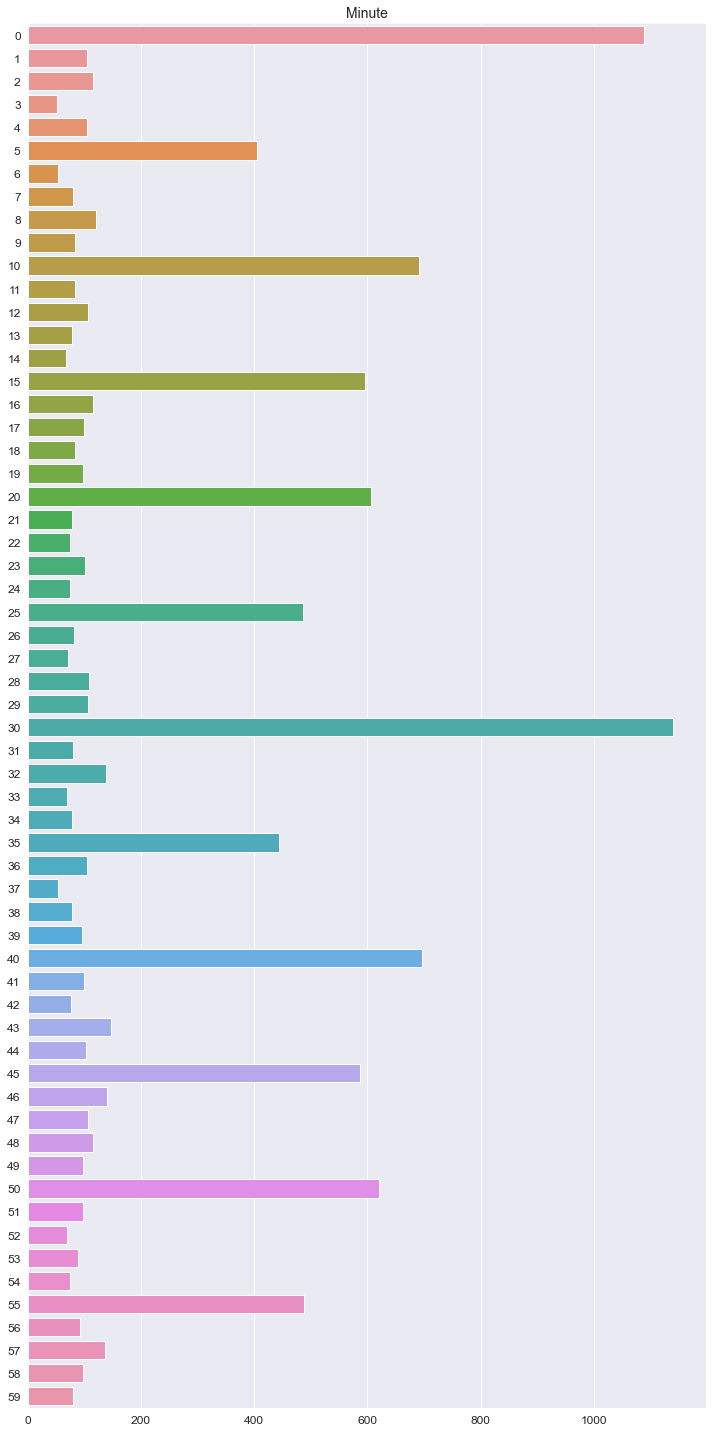

In [33]:
# Checking the minute column

plt.figure(figsize=(10,20))
sns.countplot(data=rta_data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()



## Observations

1. Most of the accidents
* Occured on Friday
* Occured at 8AM and 5PM(office & school hours)
* Occured at two-way lines
* Sunday has less number of accidents
* Severity of accident is slight injuiry

2. Casuality

* Avg Casuality number is 1
* Severity range  of casuality is 3
* Age Range is 18-30
* Male casuality is more compared to female casuality
* Major casuality is driver himself
* Fatality occured on saturdays and sundays.

3. Drivers

* Most of the drivers are male between 18-30 age group and with 5-10 yrs of driving experience.
* Majority of the drivers who got accident are employees.
* The educational level of driver is jr.high school.

4. Most of the accidents occured in personally owned passenger vehicle.

5. Accident Area

* Majority of accidents occured in office areas rather than residential areas.
* Majority of accidents occured in normal day light and in Y junction.

6. Type of Collision

* Majority of accidents occured in vehicle-vehicle collision.
* The number of vehicles involved is 2 in majority of accidents.
* Major cause of accident is not keeping sufficient  distance between vehicles and lane changing.


### Abnormality

* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes. 

In [34]:
num_cols = rta_data.dtypes[rta_data.dtypes == 'int64'].index.tolist()
cat_cols = rta_data.dtypes[rta_data.dtypes != 'int64'].index.tolist()
rta_data[cat_cols]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [35]:
rta_data[num_cols]

,Number_of_vehicles_involved,Number_of_casualties,hour,minute
0,2,2,17,2
1,2,2,17,2
2,2,2,17,2
3,2,2,1,6
4,2,2,1,6
...,...,...,...,...
12311,2,1,16,15
12312,2,1,18,0
12313,1,1,13,55
12314,2,1,13,55


In [36]:
# Dropping the time column

rta_data.drop('Time', axis=1, inplace=True)

In [37]:
rta_data.isna().sum()[rta_data.isna().sum() != 0]

Educational_level          741
Vehicle_driver_relation    579
Driving_experience         829
Type_of_vehicle            950
Owner_of_vehicle           482
Area_accident_occured      239
Lanes_or_Medians           385
Road_allignment            142
Types_of_Junction          887
Road_surface_type          172
Type_of_collision          155
Vehicle_movement           308
dtype: int64

### Handling Missing values through imputation

In [38]:
impute_cols = [x for x in rta_data.isna().sum()[rta_data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = rta_data[feat].mode()[0]
    rta_data[feat].fillna(mode, inplace=True)

In [39]:
rta_data.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

### Encoding

In [40]:
def ordinal_encoder(rta_data, feats): 
    for feat in feats:    
        feat_val = list(1+np.arange(rta_data[feat].nunique()))
        feat_key = list(rta_data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key, feat_val))
        rta_data[feat] = rta_data[feat].map(feat_dict)
    return rta_data

rta_data = ordinal_encoder(rta_data, rta_data.drop(['Accident_severity'], axis=1).columns)
rta_data.shape

(12316, 29)

In [41]:
rta_data

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,1,4,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,10,Slight Injury,18,3
1,2,2,2,5,1,4,12,4,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,18,3
2,2,1,2,5,1,1,6,4,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury,18,3
3,4,1,2,5,1,3,12,1,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury,2,7
4,4,1,2,5,1,2,1,4,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,1,2,5,4,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,6,11,Slight Injury,17,16
12312,4,5,2,2,1,3,1,4,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,6,11,Slight Injury,19,1
12313,4,3,2,5,1,3,2,4,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury,14,56
12314,4,1,1,5,1,4,6,4,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,6,6,Slight Injury,14,56


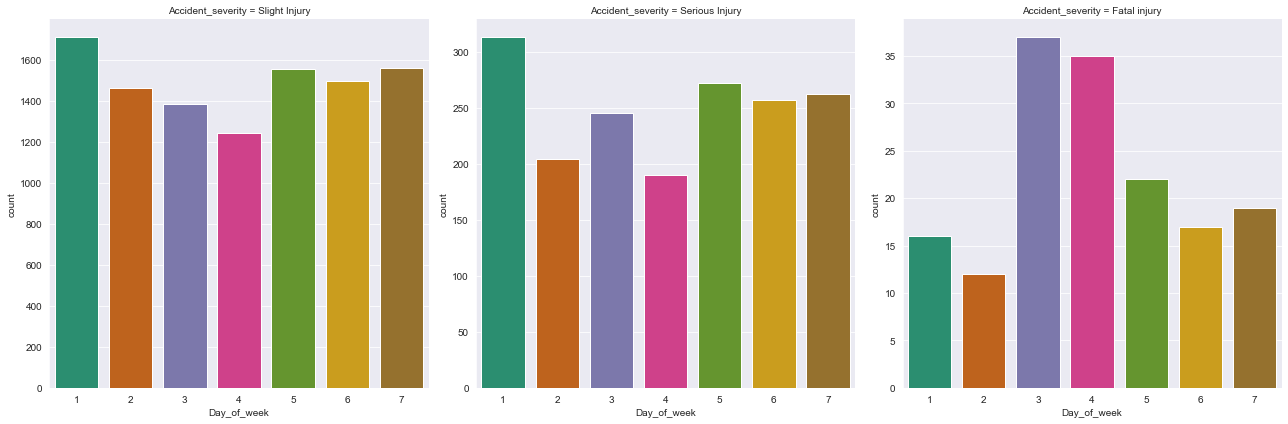

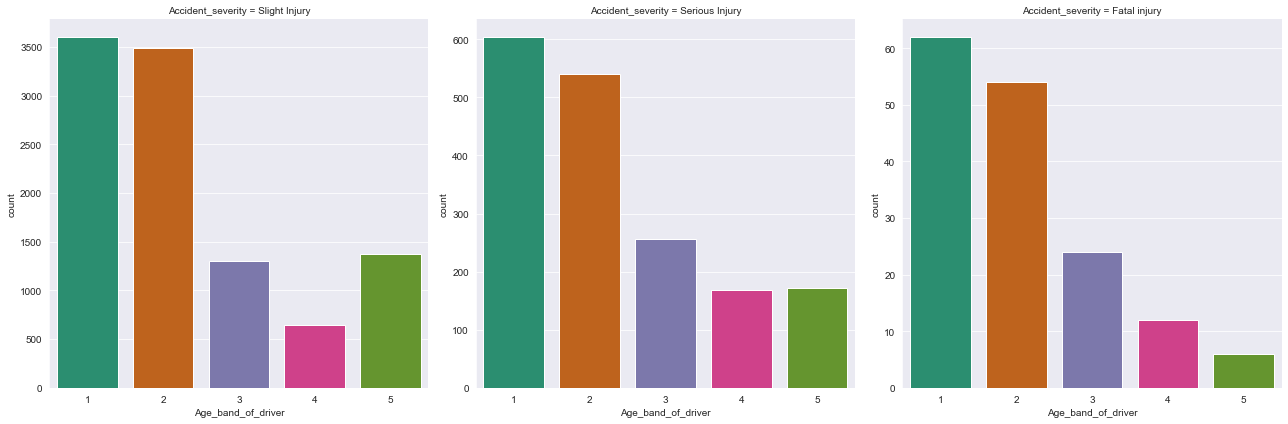

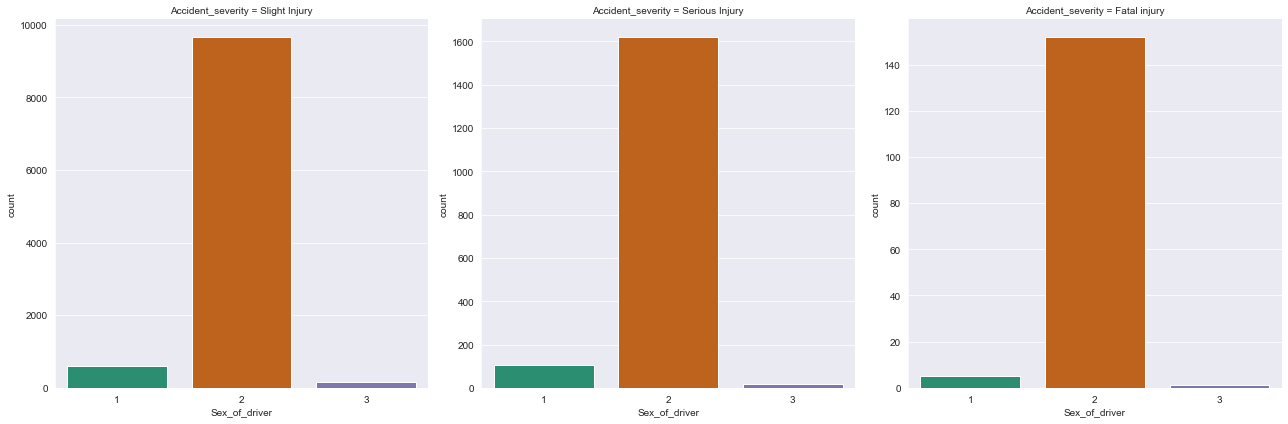

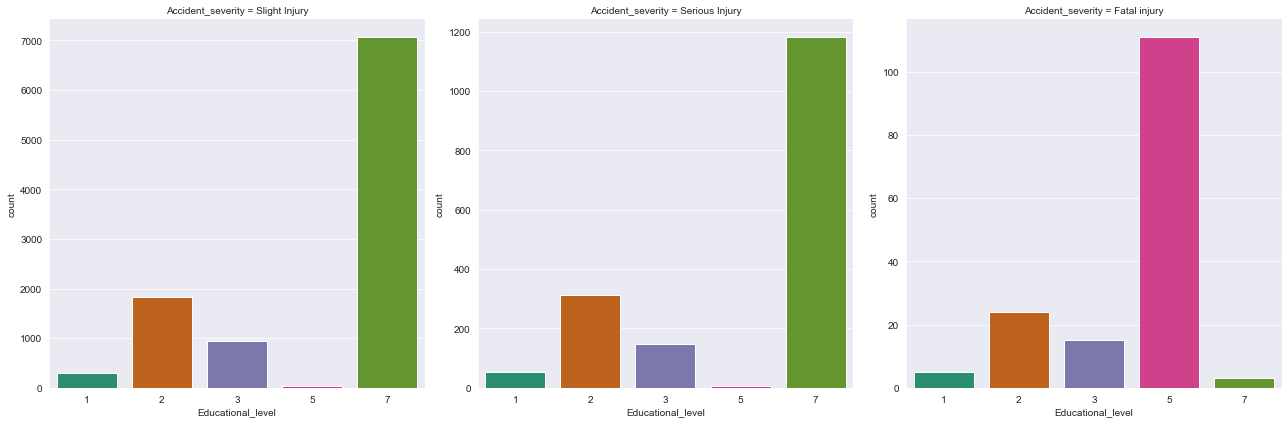

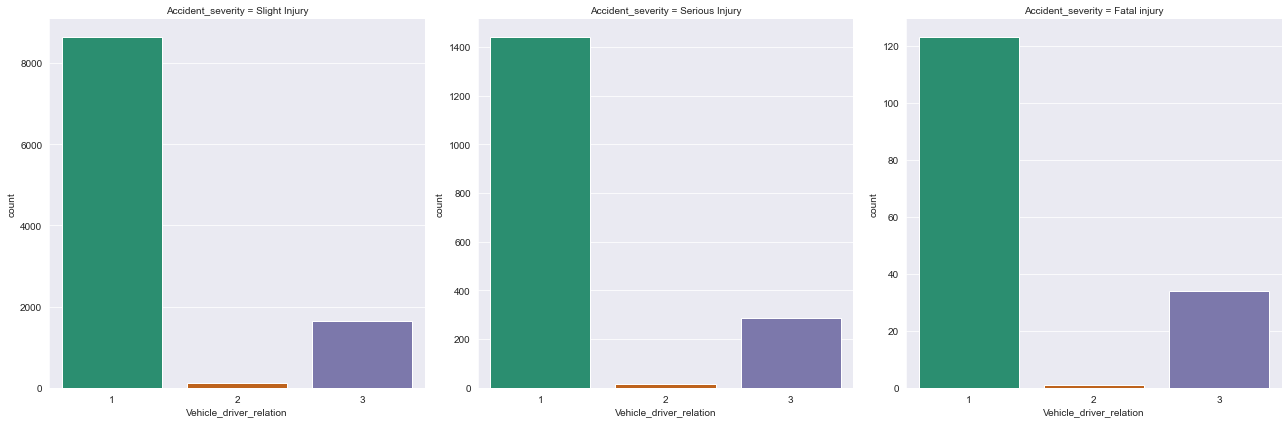

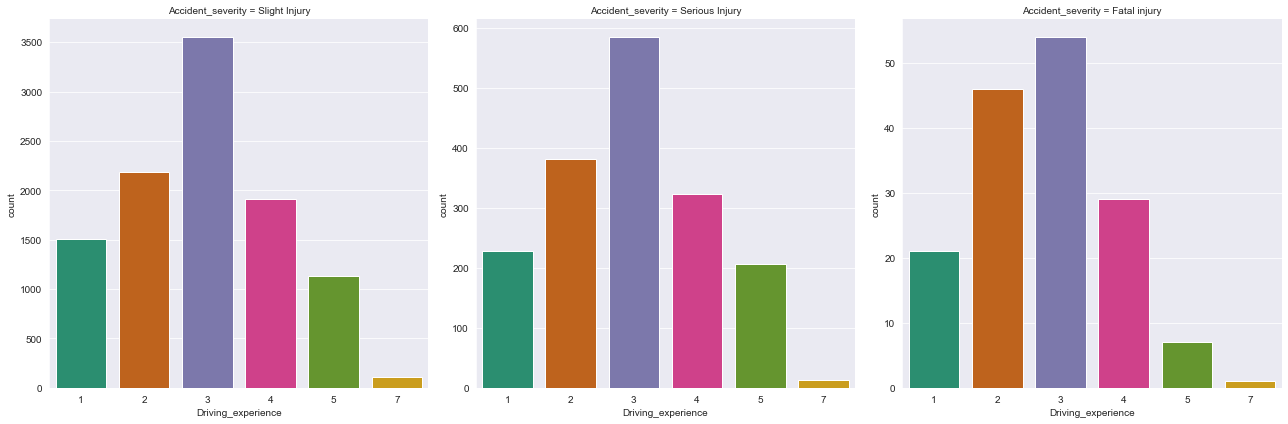

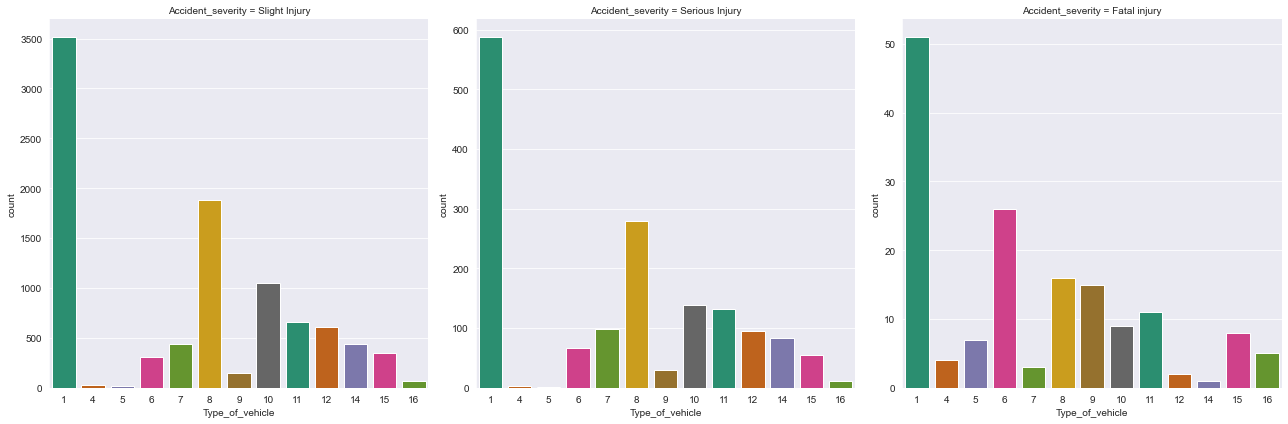

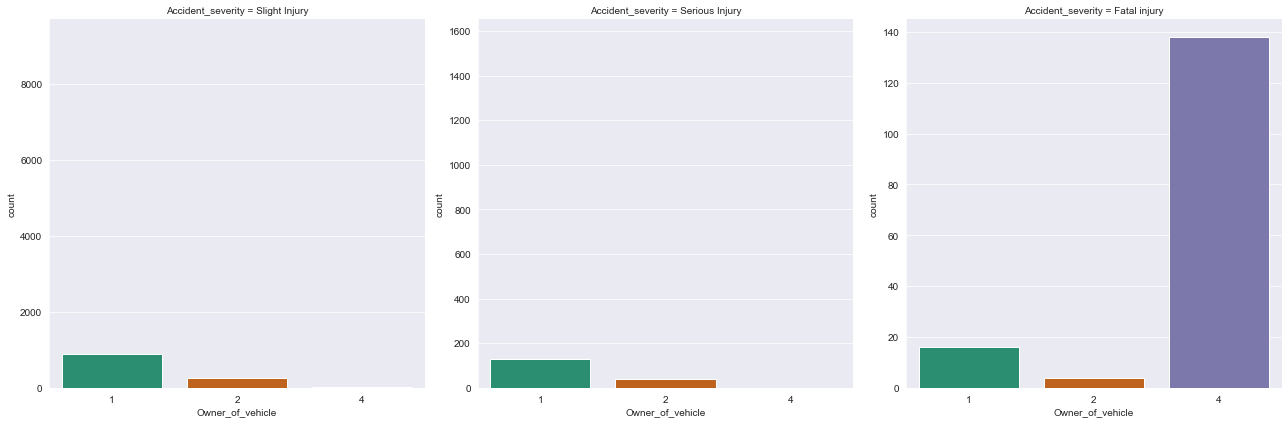

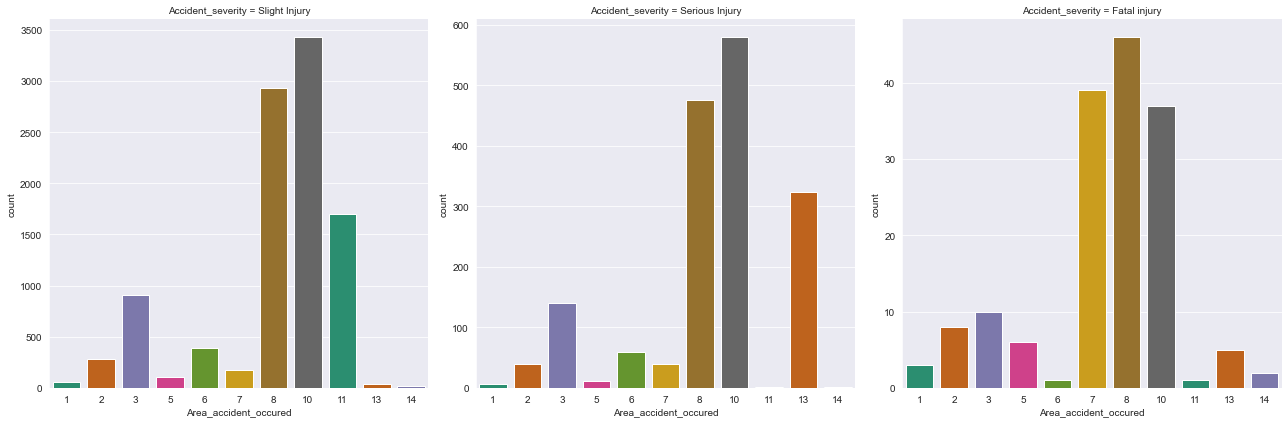

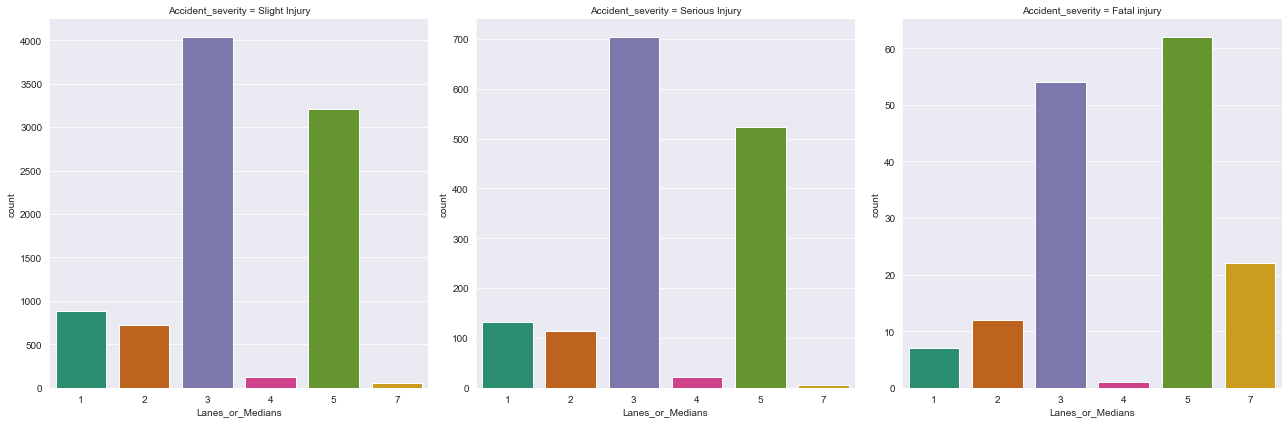

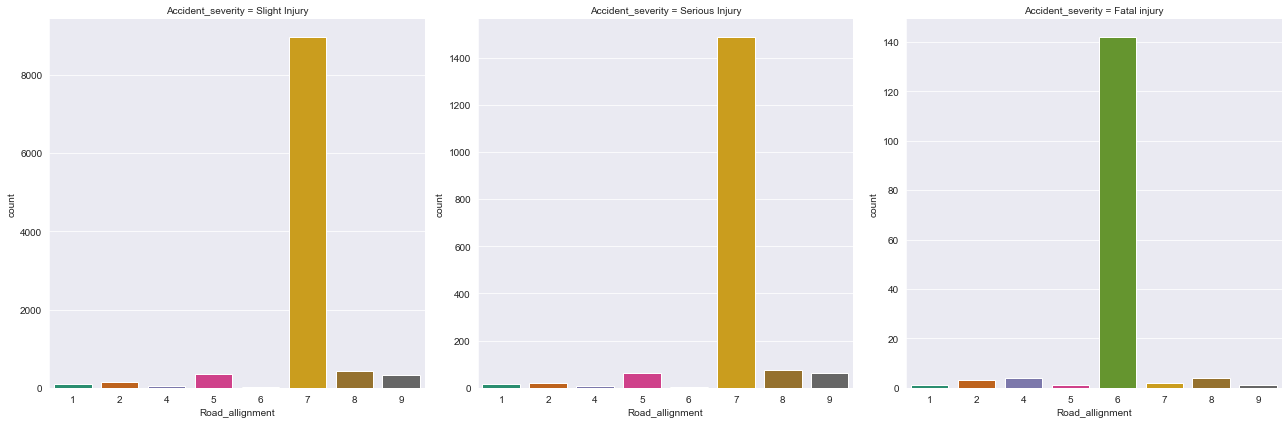

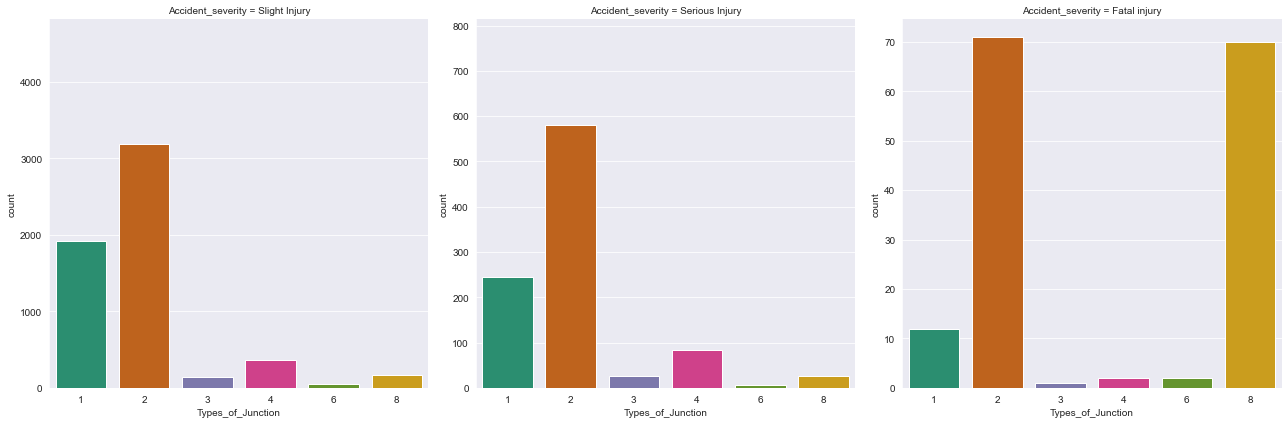

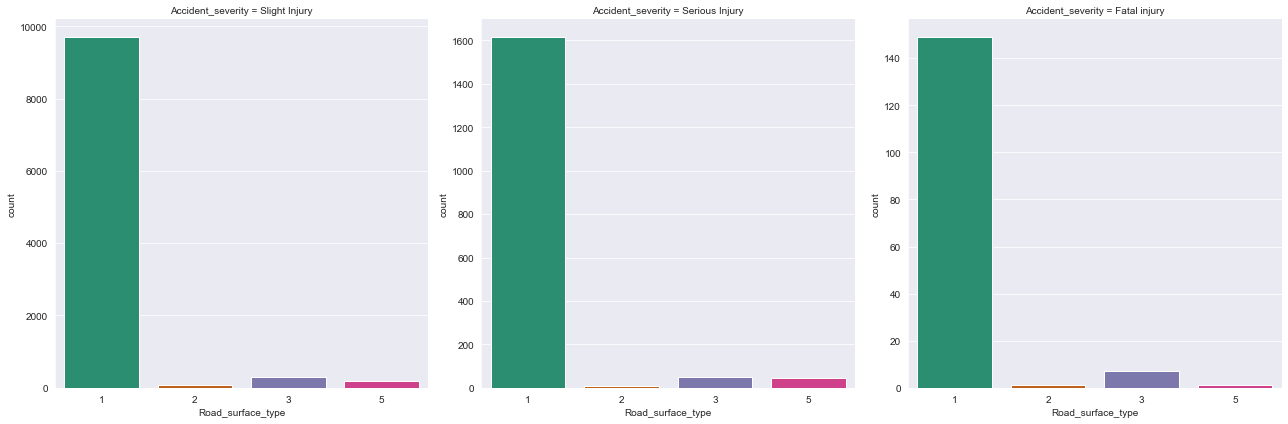

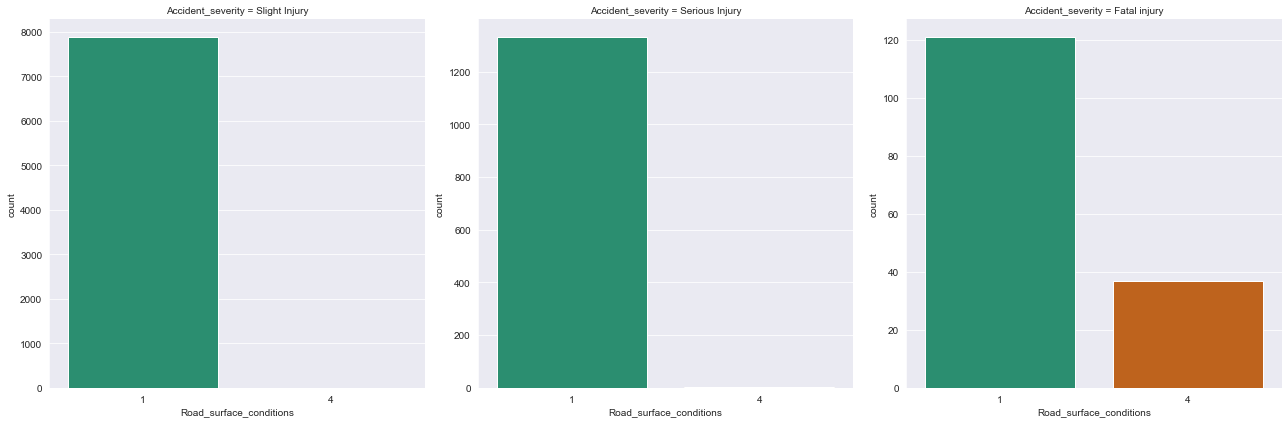

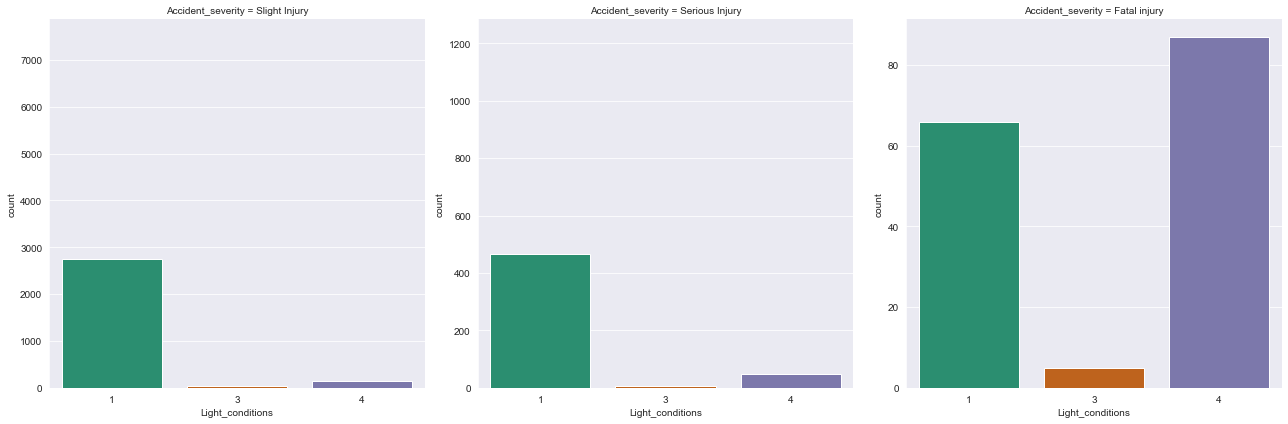

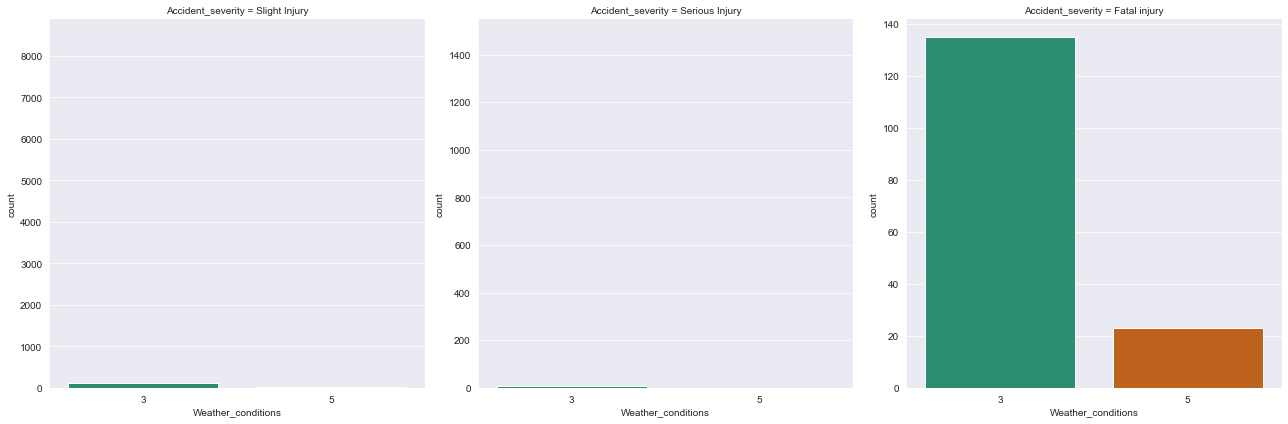

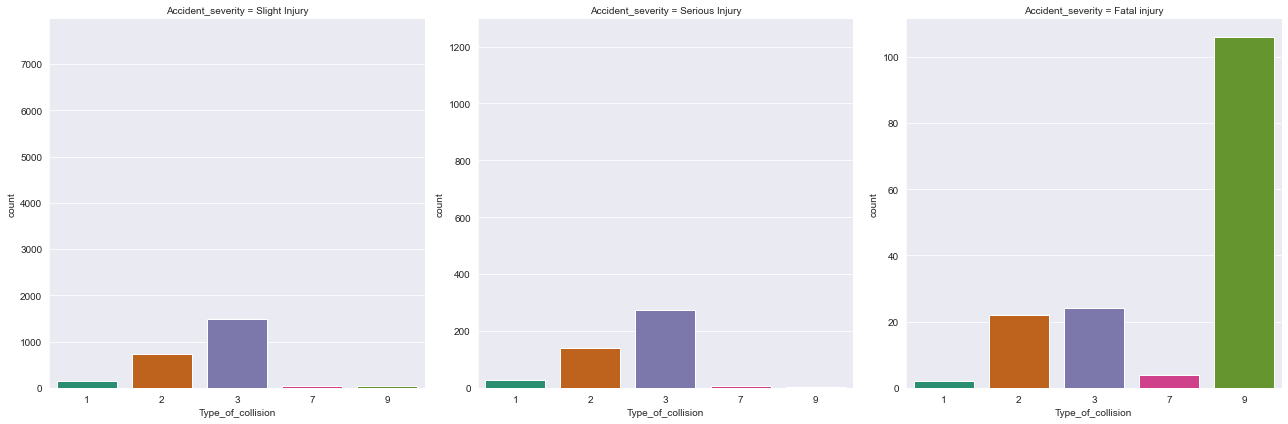

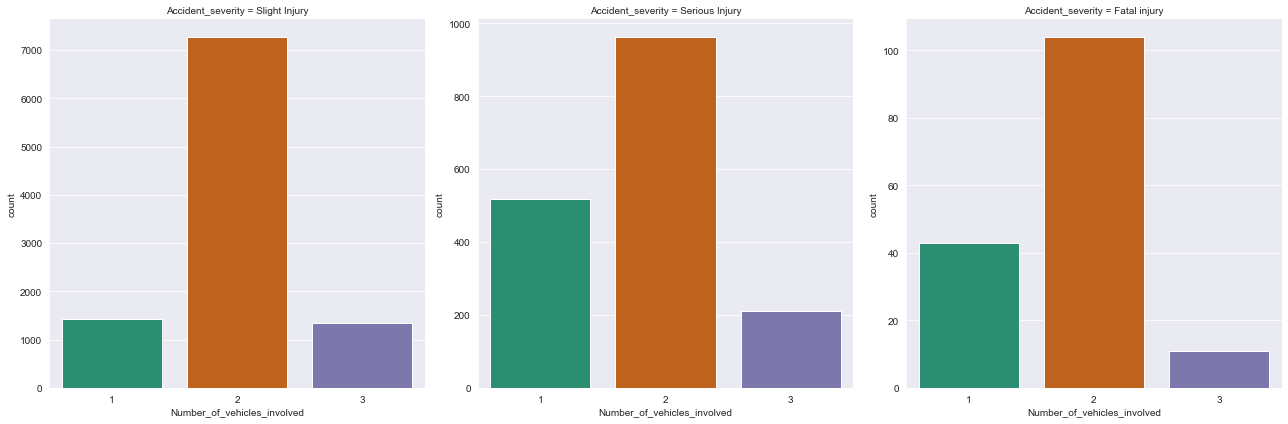

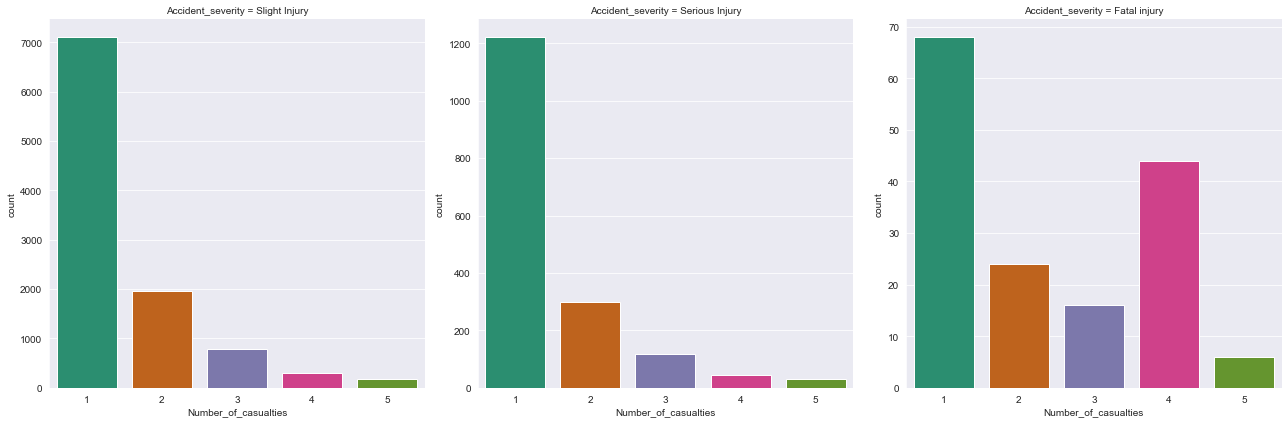

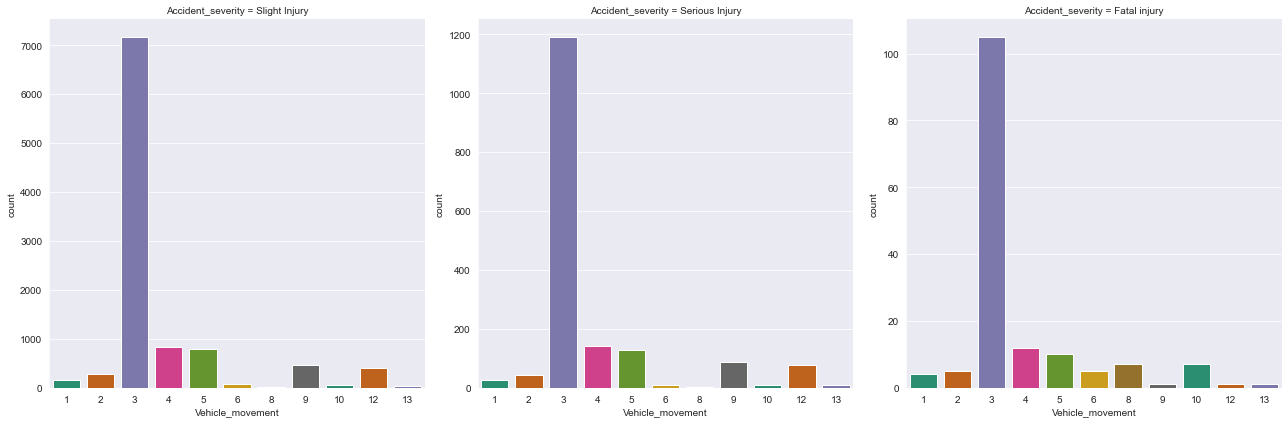

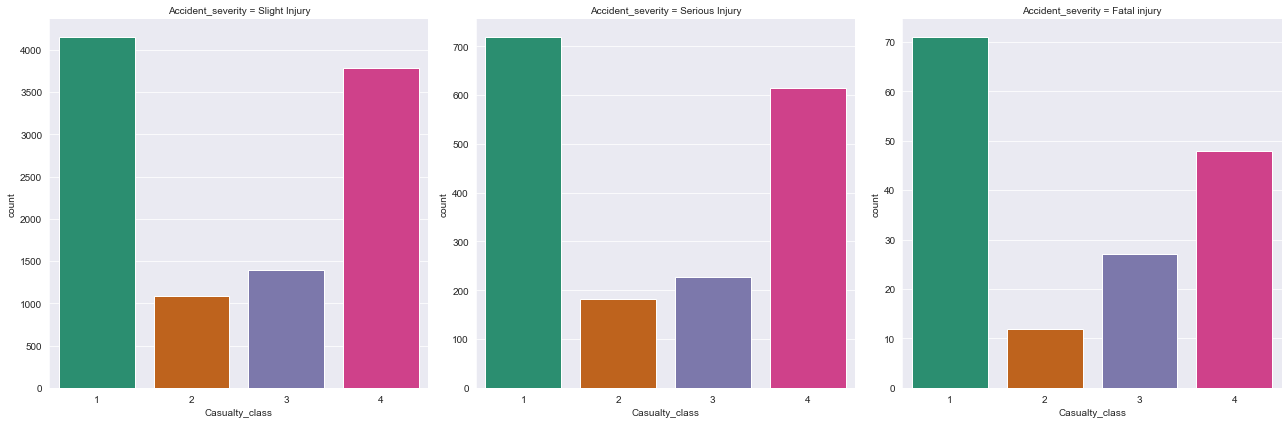

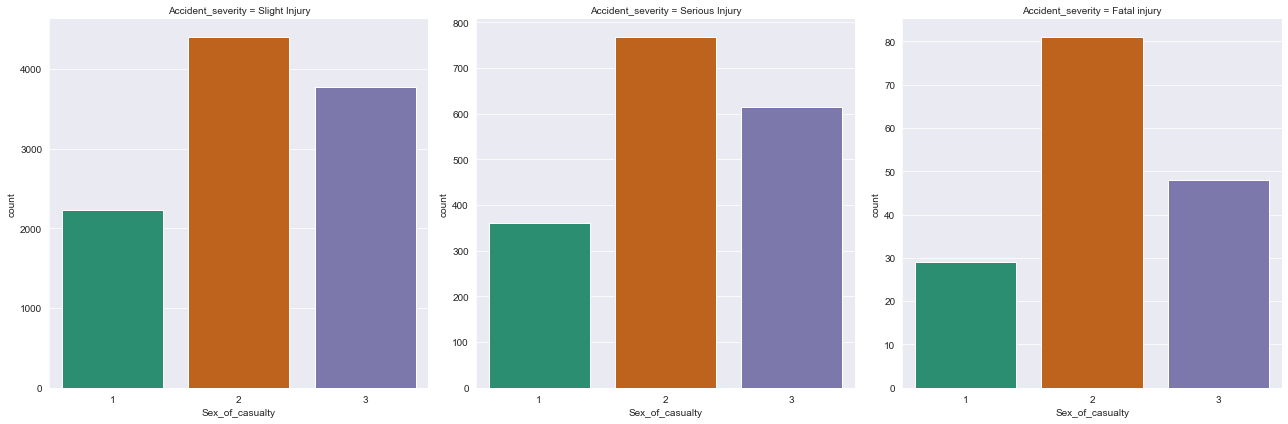

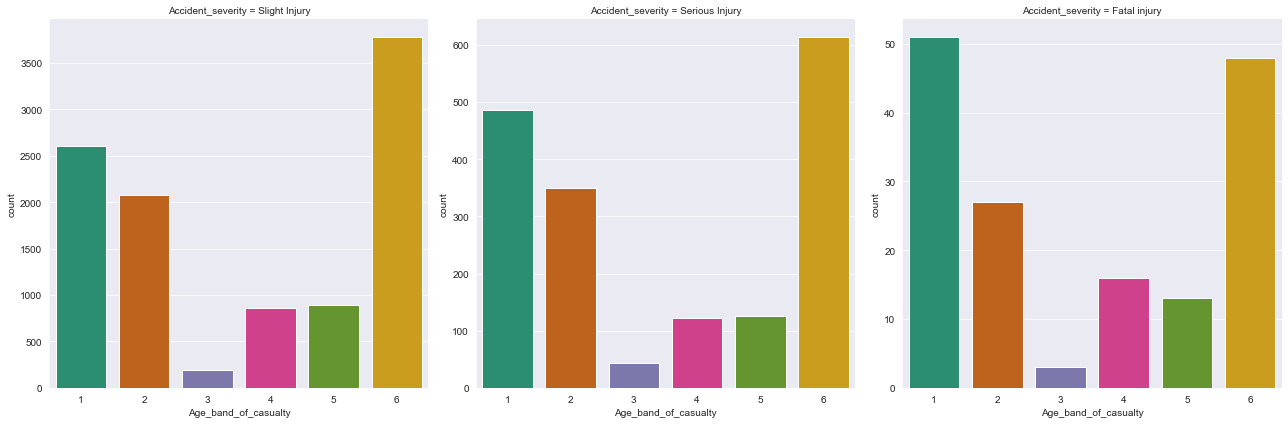

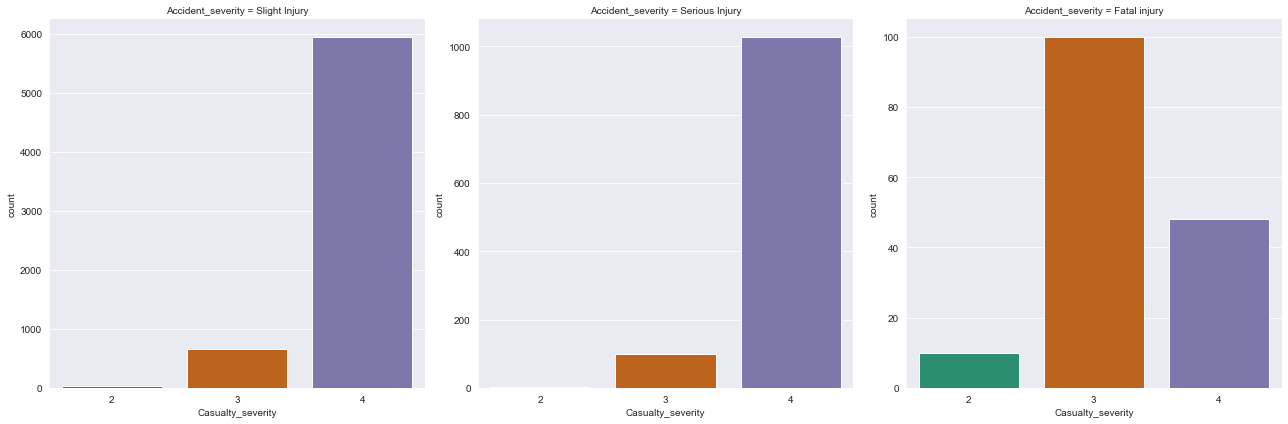

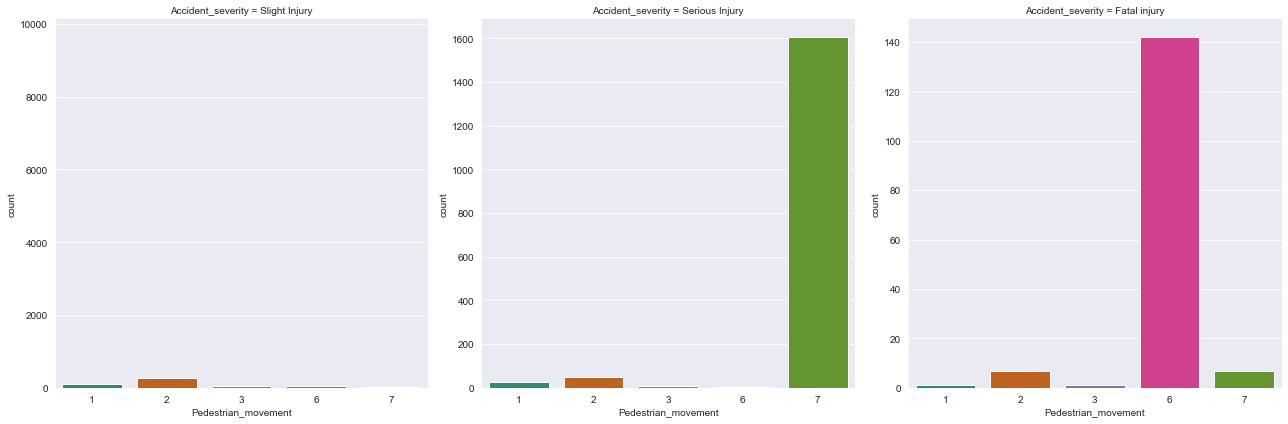

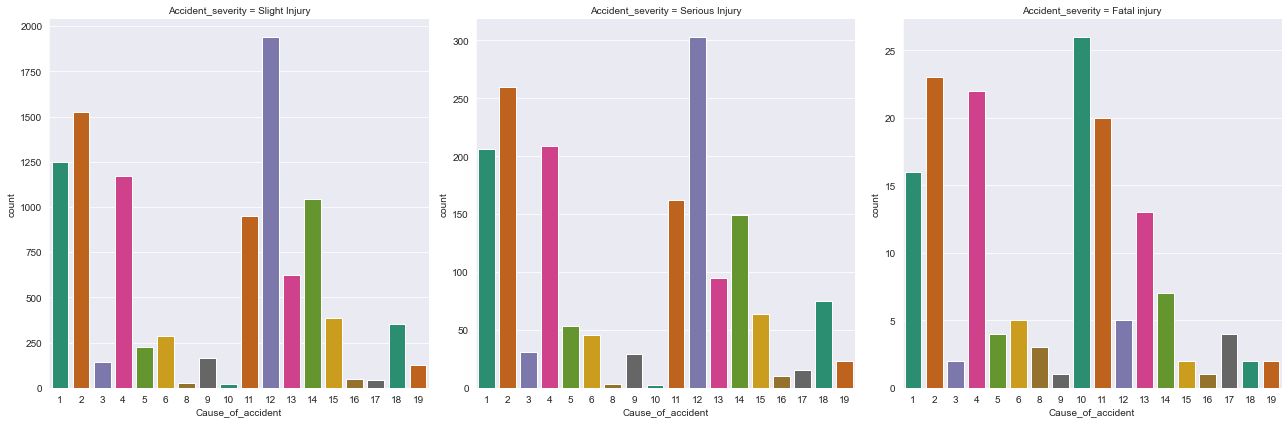

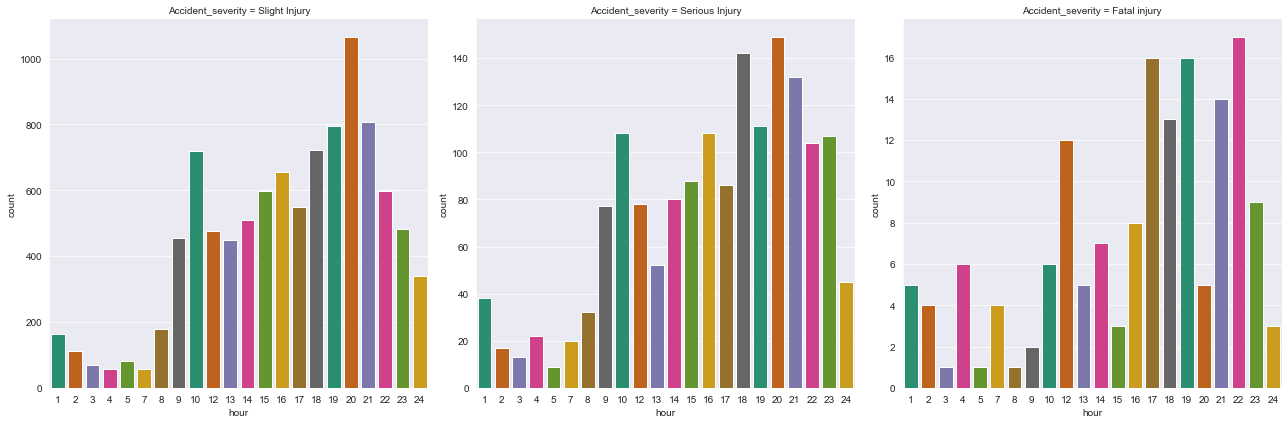

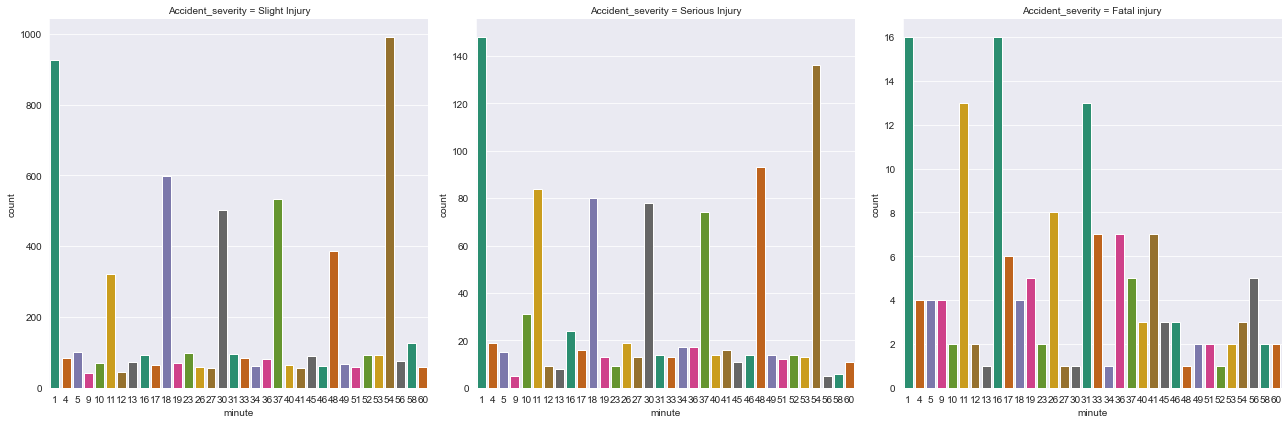

In [42]:
for col in rta_data.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(rta_data, col='Accident_severity', size=6, aspect=1, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

### Observations

* Most of the accidents with fatal injuries happened between 12pm to 10pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.



### Correlation

<AxesSubplot:>

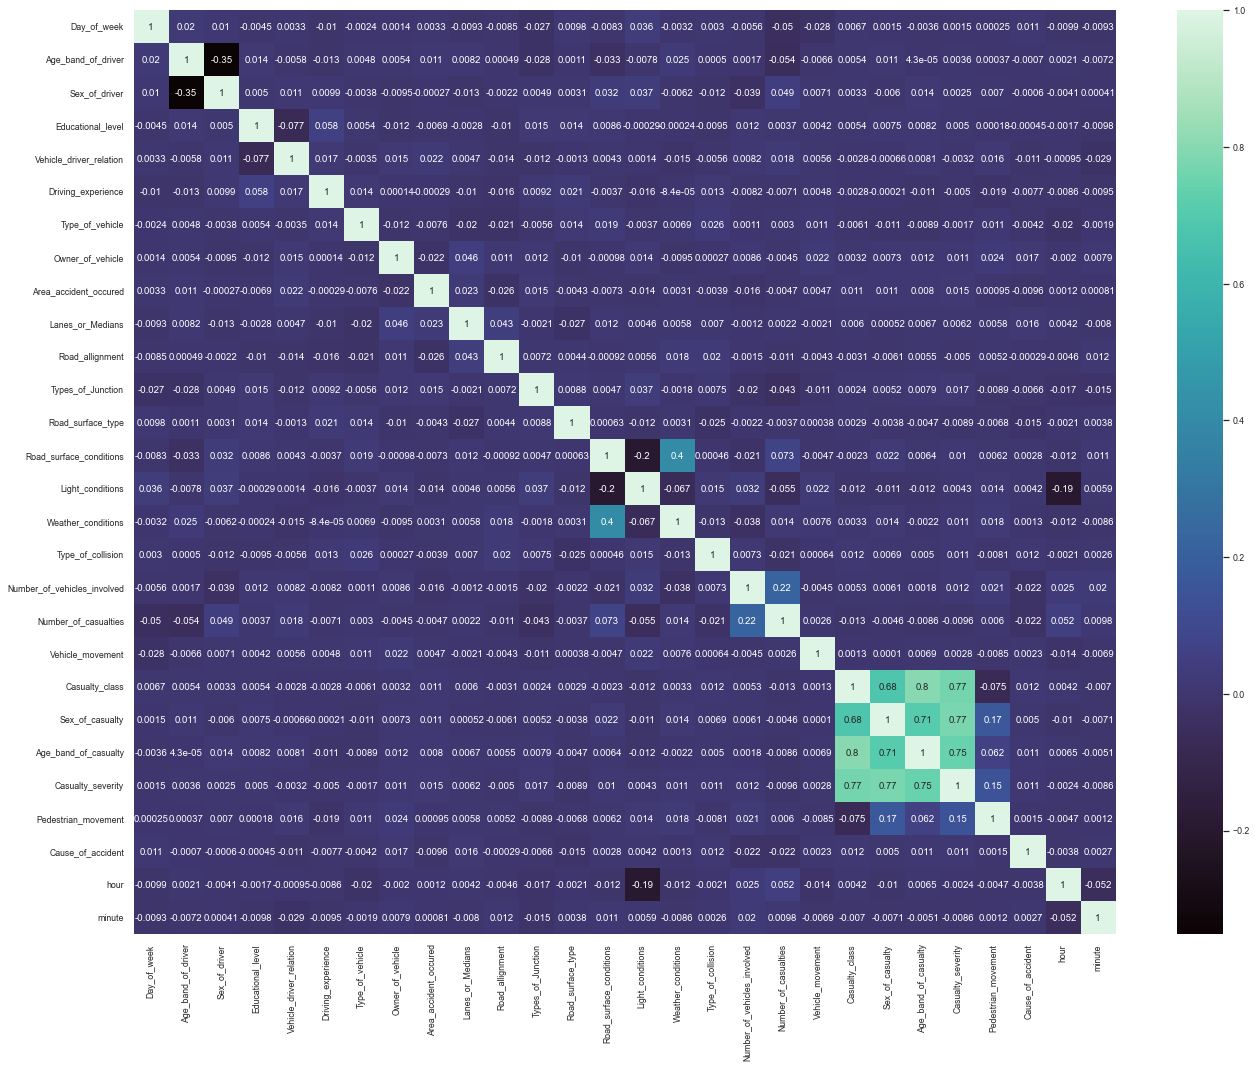

In [43]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(rta_data.corr(), annot=True, cmap='mako')

### Upsampling

In [44]:
X = rta_data.drop('Accident_severity', axis=1)
y = rta_data['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [45]:
rta_data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

In [46]:
features=['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'hour']

In [47]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


In [48]:
y_test


4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: Accident_severity, Length: 3695, dtype: object

In [49]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

In [50]:

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [51]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


gbc = GradientBoostingClassifier(random_state = 0, learning_rate=0.45)
rfc = RandomForestClassifier(random_state = 0) 
lr = LogisticRegression(random_state = 0) 
dtc = DecisionTreeClassifier(random_state = 0) 
svc = SVC(random_state = 0) 
#extree = ExtraTreesClassifier()
        

lst = []

for i in(gbc,rfc,dtc,lr,svc):
    i.fit(X_train, y_train)

    i_pred = i.predict(X_test)

    cm = confusion_matrix(y_test, i_pred)

    cr = classification_report(y_test, i_pred)
    i_acc = round(accuracy_score(y_test, i_pred), 4)

    lst.append(i_acc)

    print(i,':\n','The confusion matrix:\n',cm,'\n')

    print('The classification report:\n',cr,'\n')

    print('-'*60)

GradientBoostingClassifier(learning_rate=0.45, random_state=0) :
 The confusion matrix:
 [[   6    4   42]
 [   8  118  426]
 [  41  298 2752]] 

The classification report:
               precision    recall  f1-score   support

           1       0.11      0.12      0.11        52
           2       0.28      0.21      0.24       552
           3       0.85      0.89      0.87      3091

    accuracy                           0.78      3695
   macro avg       0.41      0.41      0.41      3695
weighted avg       0.76      0.78      0.77      3695
 

------------------------------------------------------------
RandomForestClassifier(random_state=0) :
 The confusion matrix:
 [[   3    8   41]
 [   1  107  444]
 [   3  259 2829]] 

The classification report:
               precision    recall  f1-score   support

           1       0.43      0.06      0.10        52
           2       0.29      0.19      0.23       552
           3       0.85      0.92      0.88      3091

    accuracy  

### Checking the accuracy score of different model

In [52]:
Table = pd.DataFrame({'Model':['Gradient Boosting Classifier','Random Forest Classifier','Logistic Regression','Decision Tree Classifier','SVC'],
                     'Acc_Score': lst})

Table.sort_values('Acc_Score', ascending = False)

,Model,Acc_Score
1,Random Forest Classifier,0.7954
0,Gradient Boosting Classifier,0.7783
2,Logistic Regression,0.6991
4,SVC,0.5697
3,Decision Tree Classifier,0.5166


Random Forest Claasifier gives highest accuracy and hence decided to proceed with Extratrees classifier.

In [53]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [54]:
print("Accuracy Model_RF:",metrics.accuracy_score(y_test, y_pred))

Accuracy Model_RF: 0.7953991880920163


### Feature Importance

In [55]:
from sklearn.feature_selection import SelectFromModel
Model_SF = SelectFromModel(rfc) # this is to apply the feature selction on the RF model
Model_SF.fit(X_train, y_train.ravel())

print(Model_SF.get_support())

# return the features from the dataset that are important (correspond to the true index)
cols = Model_SF.get_support(indices=True)
print(cols)
selected_features = rta_data.iloc[:,cols]
selected_features.head()

[ True  True False False False  True  True False  True  True False  True
 False False  True False False  True  True False False False False False
 False  True  True  True]
[ 0  1  5  6  8  9 11 14 17 18 25 26 27]


,Day_of_week,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,Accident_severity,hour
0,2,1,1,1,10,3,2,4,2,2,10,Slight Injury,18
1,2,2,4,12,7,5,2,4,2,2,17,Slight Injury,18
2,2,1,1,6,2,7,2,4,2,2,1,Serious Injury,18
3,4,1,3,12,7,7,8,1,2,2,2,Slight Injury,2
4,4,1,2,1,5,7,8,1,2,2,17,Slight Injury,2


In [56]:
X1 = selected_features.drop('Accident_severity', axis=1)
y1 = rta_data['Accident_severity']


In [57]:
# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3)

In [58]:
y_test1 = ordinal_encoder(pd.DataFrame(y_test1, columns = ['Accident_severity']), pd.DataFrame(y_test1, columns = ['Accident_severity']).columns)['Accident_severity']
y_train1 = ordinal_encoder(pd.DataFrame(y_train1, columns = ['Accident_severity']), pd.DataFrame(y_train1, columns = ['Accident_severity']).columns)['Accident_severity']

In [59]:
# use the RF Model to train, test and print the accuracy

rfc.fit(X_train1, y_train1)
y_pred1 = rfc.predict(X_test1)


print("Accuracy RF after excluding irrelevant features:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy RF after excluding irrelevant features: 0.8514208389715833


In [60]:
cm = confusion_matrix(y_test1, y_pred1)
cr = classification_report(y_test1, y_pred1)
i = round(accuracy_score(y_test1, y_pred1), 4)
print(i,':\n','The confusion matrix:\n',cm,'\n')
print('The classification report:\n',cr,'\n')
print('-'*60)

0.8514 :
 The confusion matrix:
 [[   3    0   37]
 [   0   40  500]
 [   0   12 3103]] 

The classification report:
               precision    recall  f1-score   support

           1       1.00      0.07      0.14        40
           2       0.77      0.07      0.14       540
           3       0.85      1.00      0.92      3115

    accuracy                           0.85      3695
   macro avg       0.87      0.38      0.40      3695
weighted avg       0.84      0.85      0.80      3695
 

------------------------------------------------------------


In [61]:
rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Hyper parameter Tuning

In [62]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train1, y=y_train1)

# A parameter grid for ETrees
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

rfc_estimator = RandomForestClassifier()

gsearch = GridSearchCV(
    estimator= rfc_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

rfc_model = gsearch.fit(X=X_train1, y=y_train1)
(gsearch.best_params_, gsearch.best_score_)







Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 2,
  'n_estimators': 100},
 0.7872601577271903)

In [63]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train1, y=y_train1)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= rfc,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

rfc_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 500},
 0.793252464243321)

In [64]:
rfc_tuned = RandomForestClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

rfc_tuned.fit(X_train1, y_train1)
y_pred_new = rfc_tuned.predict(X_test1)

In [72]:

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test1,y_pred_new))


Accuracy for Random Forest on CV data:  0.8468200270635995


In [74]:
cm = confusion_matrix(y_test1, y_pred_new)
cr = classification_report(y_test1, y_pred_new)
i = round(accuracy_score(y_test1, y_pred_new), 4)
print(i,':\n','The confusion matrix:\n',cm,'\n')
print('The classification report:\n',cr,'\n')
print('-'*60)

0.8468 :
 The confusion matrix:
 [[   5    0   35]
 [   0   29  511]
 [   0   20 3095]] 

The classification report:
               precision    recall  f1-score   support

           1       1.00      0.12      0.22        40
           2       0.59      0.05      0.10       540
           3       0.85      0.99      0.92      3115

    accuracy                           0.85      3695
   macro avg       0.81      0.39      0.41      3695
weighted avg       0.81      0.85      0.79      3695
 

------------------------------------------------------------


In [75]:
y_pred_new

array([3, 3, 3, ..., 3, 3, 3])

### Explainable AI

In [76]:
shap.initjs()

In [77]:
X_sample = X_train1.sample(100)
X_sample

,Day_of_week,Age_band_of_driver,Driving_experience,Type_of_vehicle,Area_accident_occured,Lanes_or_Medians,Types_of_Junction,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Cause_of_accident,hour
12262,6,2,4,6,5,5,8,1,1,1,4,17
9377,2,1,1,15,8,3,8,4,3,1,2,18
3462,4,1,1,8,8,7,1,1,2,2,4,2
7287,7,3,2,8,10,7,1,4,3,2,1,15
2362,6,2,2,11,10,2,2,4,2,1,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1017,6,2,1,1,10,3,8,4,2,1,11,12
2807,7,1,3,6,10,2,8,4,2,1,17,18
719,1,1,3,8,7,3,1,1,2,1,2,18
10697,7,2,5,5,10,3,8,4,2,4,13,9


In [78]:
shap_values = shap.TreeExplainer(rfc_tuned).shap_values(X_sample)

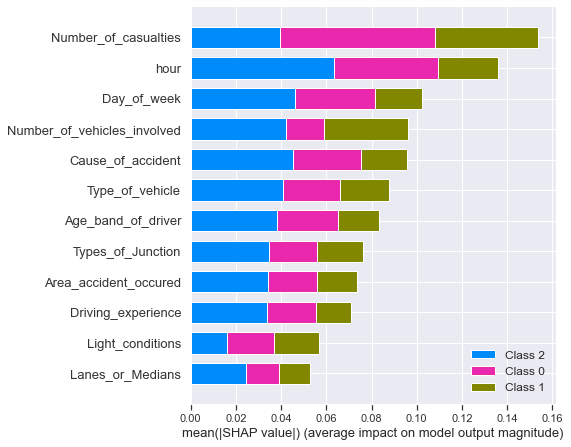

In [79]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

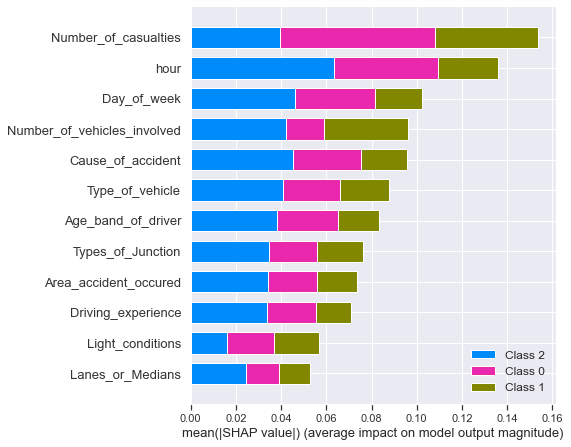

In [80]:
shap.summary_plot(shap_values, X_sample, max_display=28)

In [81]:
shap.force_plot(shap.TreeExplainer(rfc_tuned).expected_value[0],
                shap_values[0][:], 
                X_sample)

In [82]:
print(y_pred_new[50])
shap.force_plot(shap.TreeExplainer(rfc_tuned).expected_value[0], shap_values[1][50], X_sample.iloc[50])

3


In [83]:
i=13
print(y_pred_new[i])
shap.force_plot(shap.TreeExplainer(rfc_tuned).expected_value[0], shap_values[0][i], X_sample.values[i], feature_names = X_sample.columns)

3


3


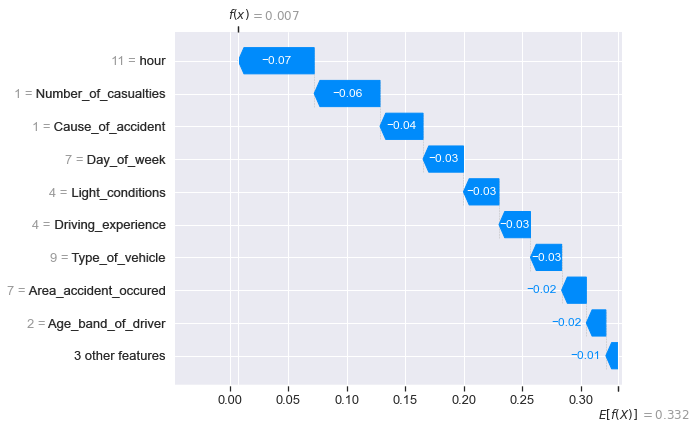

In [91]:
print(y_pred_new[10])
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=shap.TreeExplainer(rfc_tuned).expected_value[0], data=X_sample.iloc[row],  
                                         feature_names=X_sample.columns.tolist()))

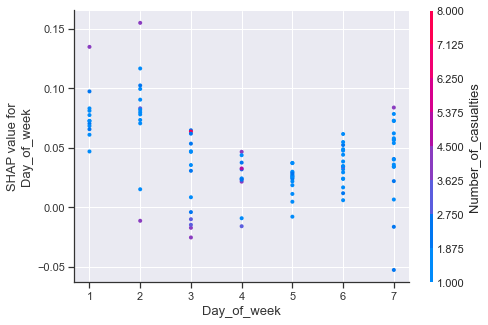

In [87]:
shap.dependence_plot('Day_of_week', shap_values[2], X_sample)

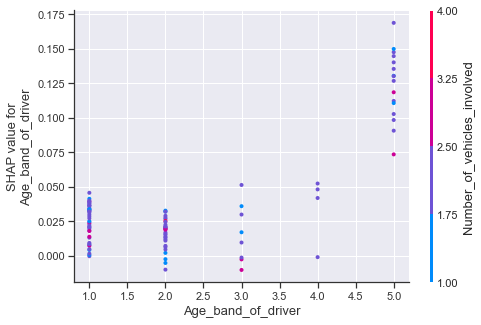

In [88]:
shap.dependence_plot('Age_band_of_driver', shap_values[2], X_sample)

3


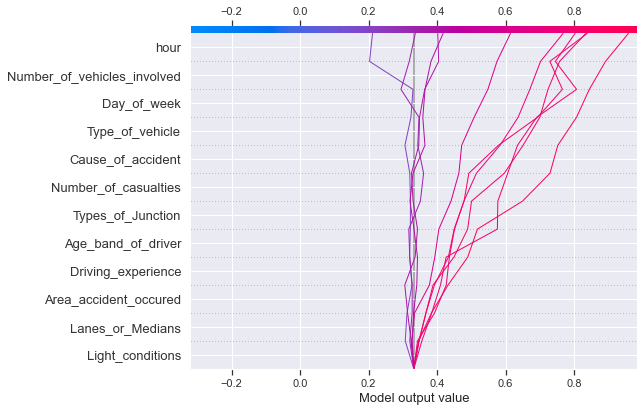

In [89]:
print(y_pred_new[10])
shap.decision_plot(shap.TreeExplainer(rfc_tuned).expected_value[0], 
                   shap_values[2][:10], 
                   feature_names=X_sample.columns.tolist())